# Scraping NBA Stats

## Motivation

The National Basketball Association (NBA) is a professional basketball league in North America, currently composed of 30 teams (29 in the US and 1 in Canada). It is the best basketball league in the world attracting the best players from around the world. Every year, around the midpoint of the season in February, they organize an exhibition game called the All-Star game. 24 of the best players in the league are chosen as the All-Stars to play in this game as voted by fans, media, fellow players and coaches. 

Being an all-star is regarded as a great achievement and therefore has been used as a metric in ranking the players historically. Usually team success and player performance are used by the voters in their selections. The goal of this study is to gather pre-all-star break data from the official NBA stats website to see if we can develop a machine learning model that can predict this year's all-stars based on per game stats.   

## Pre All-Star Per Game Stats

As the All-Star selection is based on player performance up to that point, we need the stats from that portion of the season. The official NBA stats page has a filter called Pre All-Star for the season segment:

https://www.nba.com/stats/players/traditional/?sort=PLAYER_NAME&dir=-1&Season=2020-21&SeasonType=Regular%20Season&SeasonSegment=Pre%20All-Star

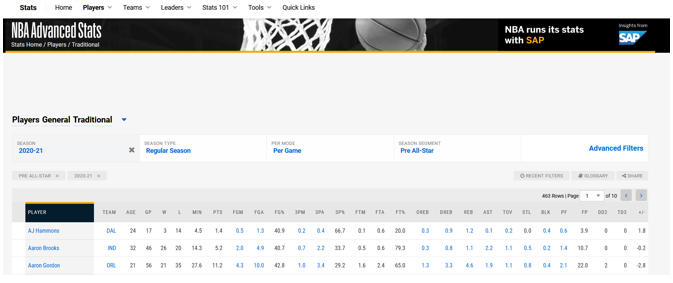

Upon inspection, it can be seen that the data is not stored on the HTML source page meaning that the python library beautiful soup cannot be utilized. There is an article by Ashwin M Murugappan titled "How Scraping NBA Stats is cooler than Michael Jordan" that describes this problem:

https://towardsdatascience.com/how-scraping-nba-stats-is-cooler-than-michael-jordan-49d7562ce3ef

The article explains that "...the NBA stats website was built with an AngularJS, which means that the site is rendered client-side instead of server-side...

The HTML which is rendered is only a template and it doesn’t hold any data, The Javascript in the server response fetches the data from an API and uses it to create the page client-side.

Basically, when you view the pages source code, you wouldn’t find the data but just a template of the webpage..."

As per the article, one needs to call the API endpoint using the URL and Query String Parameters. We can adopt this approach into our problem and define a for loop to gather data from multiple seasons:

In [1]:
from requests import get
import pandas as pd

# The request url stated under the headers of the website
url = 'https://stats.nba.com/stats/leaguedashplayerstats'

# The request header from the page
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Host': 'stats.nba.com',
    'Origin': 'https://www.nba.com',
    'Pragma': 'no-cache',
    'Referer': 'https://www.nba.com/',
    'sec-ch-ua-mobile': '?0',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}

# Create empty dataframe to append to
players = pd.DataFrame()

# NBA Pre All-Star Stats go back to 1996-97 season
seasons = ['2020-21', '2019-20', '2018-19', '2017-18', '2016-17', '2015-16', '2014-15', '2013-14',
           '2012-13', '2011-12', '2010-11', '2009-10', '2008-09', '2007-08', '2006-07', '2005-06',
          '2004-05', '2003-04', '2002-03', '2001-02', '2000-01', '1999-00', '1998-99', '1997-98', '1996-97']

# Loop through the seasons to request each page
for season in seasons:
    # The Query String Parameter from the page
    params = (
        ('College', ''),
        ('Conference', ''),
        ('Country', ''),
        ('DateFrom', ''),
        ('DateTo', ''),
        ('Division', ''),
        ('DraftPick', ''),
        ('DraftYear', ''),
        ('GameScope', ''),
        ('GameSegment', ''),
        ('Height', ''),
        ('LastNGames', '0'),
        ('LeagueID', '00'),
        ('Location',''),
        ('MeasureType', 'Base'),
        ('Month', '0'),
        ('OpponentTeamID', '0'),
        ('Outcome',''),
        ('PORound', '0'),
        ('PaceAdjust', 'N'),
        ('PerMode', 'PerGame'),
        ('Period', '0'),
        ('PlayerExperience', ''),
        ('PlayerPosition', ''),
        ('PlusMinus', 'N'),
        ('Rank', 'N'),
        ('Season', season),
        ('SeasonSegment', 'Pre All-Star'),
        ('SeasonType', 'Regular Season'),
        ('ShotClockRange', ''),
        ('StarterBench', ''),
        ('TeamID', '0'),
        ('TwoWay', '0'),
        ('VsConference', ''),
        ('VsDivision', ''),
        ('Weight', '')
    )
    # Make a get request
    response = get(url, headers=headers, params=params)

    # Web request into JSON format
    jsn = response.json()

    # Reformat the JSON to DataFrame
    df = pd.DataFrame(jsn['resultSets'][0]['rowSet'])

    # Assigning column headers
    df.columns = jsn['resultSets'][0]['headers']

    # Add season as a column
    df['SEASON'] = season

    # Append dataframes
    players = pd.concat([players, df], axis=0)

players.to_csv('pre_allstar_player_stats.csv', index=False)

The resulting dataframe includes the player stats up to the all-star break from the last 25 years: 

In [2]:
players.head()

PLAYER_ID    PLAYER_NAME NICKNAME       TEAM_ID TEAM_ABBREVIATION   AGE  \
0     203932   Aaron Gordon    Aaron  1.610613e+09               DEN  25.0   
1    1628988  Aaron Holiday    Aaron  1.610613e+09               IND  24.0   
2    1630174  Aaron Nesmith    Aaron  1.610613e+09               BOS  21.0   
3    1627846    Abdel Nader    Abdel  1.610613e+09               PHX  27.0   
4    1629690    Adam Mokoka     Adam  1.610613e+09               CHI  22.0   

   GP   W   L  W_PCT  ...  PF_RANK  PFD_RANK  PTS_RANK  PLUS_MINUS_RANK  \
0  19   8  11  0.421  ...      163        47       100              351   
1  35  16  19  0.457  ...      224       275       241              200   
2  18   9   9  0.500  ...      158       328       357              137   
3  19  13   6  0.684  ...      335       213       275              116   
4   7   1   6  0.143  ...      423       474       443              315   

   NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID            CFPARAMS   SEASON  
0                    73        72        13     5   203932,1610612743  2020-21  
1                   301       119        25     5  1628988,1610612754  2020-21  
2                   381       173        25     5  1630174,1610612738  2020-21  
3                   321       173        25     5  1627846,1610612756  2020-21  
4                   442       173        25     5  1629690,1610612741  2020-21  

[5 rows x 67 columns]

In [3]:
players.tail()

PLAYER_ID      PLAYER_NAME NICKNAME       TEAM_ID TEAM_ABBREVIATION  \
420        335  Willie Anderson   Willie  1.610613e+09               MIA   
421        416    Willie Burton   Willie  1.610613e+09               ATL   
422       1365  Xavier McDaniel   Xavier  1.610613e+09               NJN   
423        212       Yinka Dare    Yinka  1.610613e+09               NJN   
424        440        Zan Tabak      Zan  1.610613e+09               TOR   

      AGE  GP   W   L  W_PCT  ...  PF_RANK  PFD_RANK  PTS_RANK  \
420  30.0   8   7   1  0.875  ...      335       135       364   
421  29.0  24  15   9  0.625  ...      171       135       213   
422  34.0  26   6  20  0.231  ...      214       135       266   
423  24.0  33   9  24  0.273  ...      331       135       388   
424  27.0  13   6   7  0.462  ...      103        18       202   

     PLUS_MINUS_RANK  NBA_FANTASY_PTS_RANK  DD2_RANK  TD3_RANK  CFID  \
420              359                   325       176        13     5   
421              319                   295       176        13     5   
422              280                   247       176        13     5   
423              187                   347       176        13     5   
424              364                   202       176        13     5   

            CFPARAMS   SEASON  
420   335,1610612748  1996-97  
421   416,1610612737  1996-97  
422  1365,1610612751  1996-97  
423   212,1610612751  1996-97  
424   440,1610612761  1996-97  

[5 rows x 67 columns]

## Team Wins Pre All-Star

As previously discussed, voters tend to reward winning teams with all-stars to acknowledge their success. So team wins at the time of voting plays as much role as the player performance. The data we acquired above does not include any information about how many games the player's team has played or how many of those games were won. This data can be found on another category in NBA stats website:

https://www.nba.com/stats/teams/traditional/?sort=TEAM_NAME&dir=-1&Season=2020-21&SeasonType=Regular%20Season&SeasonSegment=Pre%20All-Star

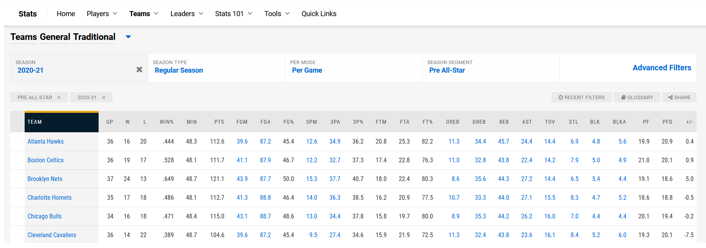

Using the same approach as the player data, we can write a for loop to gather team stats from the past 25 years:

In [4]:
# The request url stated under the headers of the website
url = 'https://stats.nba.com/stats/leaguedashteamstats'

# The request header from the page
headers = {
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'no-cache',
    'Connection': 'keep-alive',
    'Host': 'stats.nba.com',
    'Origin': 'https://www.nba.com',
    'Pragma': 'no-cache',
    'Referer': 'https://www.nba.com/',
    'sec-ch-ua-mobile': '?0',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}

# Create empty dataframe to append to
teams = pd.DataFrame()

# Loop through the seasons to request each page
for season in seasons:
    # The Query String Parameter from the page
    params = (
        ('Conference', ''),
        ('DateFrom', ''),
        ('DateTo', ''),
        ('Division', ''),
        ('GameScope', ''),
        ('GameSegment', ''),
        ('LastNGames', '0'),
        ('LeagueID', '00'),
        ('Location',''),
        ('MeasureType', 'Base'),
        ('Month', '0'),
        ('OpponentTeamID', '0'),
        ('Outcome',''),
        ('PORound', '0'),
        ('PaceAdjust', 'N'),
        ('PerMode', 'PerGame'),
        ('Period', '0'),
        ('PlayerExperience', ''),
        ('PlayerPosition', ''),
        ('PlusMinus', 'N'),
        ('Rank', 'N'),
        ('Season', season),
        ('SeasonSegment', 'Pre All-Star'),
        ('SeasonType', 'Regular Season'),
        ('ShotClockRange', ''),
        ('StarterBench', ''),
        ('TeamID', '0'),
        ('TwoWay', '0'),
        ('VsConference', ''),
        ('VsDivision', '')
    )
    # Make a get request
    response = get(url, headers=headers, params=params)

    # Web request into JSON format
    jsn = response.json()

    # Reformat the JSON to DataFrame
    df = pd.DataFrame(jsn['resultSets'][0]['rowSet'])

    # Assigning column headers
    df.columns = jsn['resultSets'][0]['headers']

    # Add season as a column
    df['SEASON'] = season

    # Append dataframes
    teams = pd.concat([teams, df], axis=0)

teams.to_csv('pre_allstar_team_stats.csv', index=False)

Now we have the necessary data on the teams:

In [5]:
teams.head()

TEAM_ID          TEAM_NAME  GP   W   L  W_PCT   MIN   FGM   FGA  FG_PCT  \
0  1610612737      Atlanta Hawks  36  16  20  0.444  48.3  39.6  87.2   0.454   
1  1610612738     Boston Celtics  36  19  17  0.528  48.1  41.1  87.9   0.467   
2  1610612751      Brooklyn Nets  37  24  13  0.649  48.7  43.9  87.7   0.500   
3  1610612766  Charlotte Hornets  35  17  18  0.486  48.1  41.3  88.8   0.464   
4  1610612741      Chicago Bulls  34  16  18  0.471  48.4  43.1  88.7   0.486   

   ...  STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
0  ...        24        17         23       18         6        17   
1  ...        12        12         15       26        13        19   
2  ...        28         7          8       10        21         1   
3  ...         7        19         19        6        18        16   
4  ...        22        22          9       20        17         6   

   PLUS_MINUS_RANK  CFID           CFPARAMS   SEASON  
0               14    10      Atlanta Hawks  2020-21  
1               10    10     Boston Celtics  2020-21  
2                7    10      Brooklyn Nets  2020-21  
3               20    10  Charlotte Hornets  2020-21  
4               17    10      Chicago Bulls  2020-21  

[5 rows x 57 columns]

## All-Star Selections

The feature we are trying to predict will be the all-star selections, so we need to know who the all-stars were in these past 25 years in order to train our model. Unfortunately, this information is not a part of the datasets we have gathered in the previous steps. The "best-organized" version of these rosters can be found on the RealGM website:

https://basketball.realgm.com/nba/allstar/game/rosters/2021

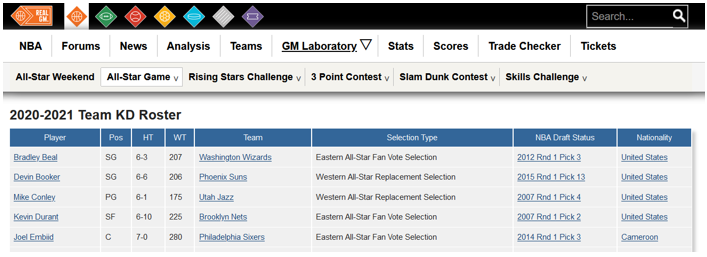

Upon inspection, we can see that the data is stored on the html page in this case:

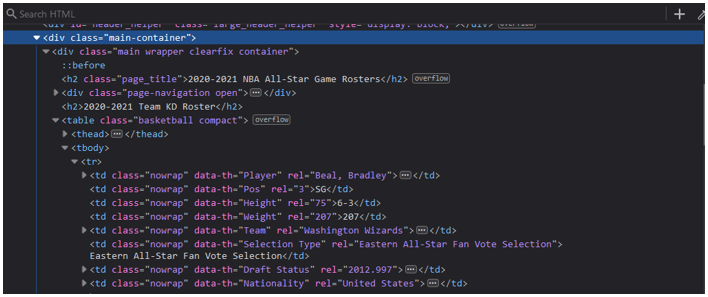

Therefore, we can use the BeautifulSoup library this time to access the necessary data more directly:

In [6]:
from bs4 import BeautifulSoup

# Starting with empty lists
name = []
pos = []
height = []
weight = []
team = []
select = []
draft = []
nation = []
years = []

# Create empty dataframe to append to
allstar = pd.DataFrame()

# Loop through the years
for year in range(1997, 2022):
    # Make a get request
    response = get('https://basketball.realgm.com/nba/allstar/game/rosters/' + str(year))
    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')
    # Select all the player containers from a single page
    containers = page_html.findAll('td', attrs={
        'data-th': ['Player', 'Pos', 'Height', 'Weight', 'Team', 'Selection Type', 'Draft Status', 'Nationality']})
    
    # Extract data from individual containers
    for i in range(0, len(containers), 8):
        years.append(year)
        name.append(containers[i].a.text)
        pos.append(containers[i+1].text)
        height.append(containers[i+2].text)
        weight.append(containers[i+3].text)
        team.append(containers[i+4].a.text)
        select.append(containers[i+5].text)
        draft.append(containers[i+6].a.text)
        nation.append(containers[i+7].text)

# Add data into a dataframe
allstar = pd.DataFrame({'YEAR': years,
    'PLAYER': name,
    'POS': pos,
    'HT': height,
    'WT': weight,
    'TEAM': team,
    'SELECTION': select,
    'DRAFT': draft,
    'NATIONALITY': nation
})

allstar.to_csv('allstar_selection.csv', index=False)

We now have the required data on the all-stars with some additional information on their positions, selection types and draft positions. 

In [7]:
allstar.head()

YEAR           PLAYER POS    HT   WT                 TEAM  \
0  1997        Vin Baker  PF  6-11  240      Milwaukee Bucks   
1  1997  Terrell Brandon  PG  5-11  180  Cleveland Cavaliers   
2  1997       Joe Dumars  SG   6-3  190      Detroit Pistons   
3  1997    Patrick Ewing   C   7-0  240      New York Knicks   
4  1997   Penny Hardaway  PG   6-7  195        Orlando Magic   

                                SELECTION               DRAFT  \
0      Eastern All-Star Coaches Selection   1993 Rnd 1 Pick 8   
1      Eastern All-Star Coaches Selection  1991 Rnd 1 Pick 11   
2  Eastern All-Star Replacement Selection  1985 Rnd 1 Pick 18   
3     Eastern All-Star Fan Vote Selection   1985 Rnd 1 Pick 1   
4     Eastern All-Star Fan Vote Selection   1993 Rnd 1 Pick 3   

            NATIONALITY  
0         United States  
1         United States  
2         United States  
3  United StatesJamaica  
4         United States

## Conclusions

In this project, we scraped data from NBA Stats and the RealGM websites in order to gather information on the all-star selections from the past 25 years. Using pages with 2 different endpoints has enabled us to utilize 2 different methods for data scraping. As a result, we have a good amount of data with the necessary information that we can work on to make predictions. 